In [1]:
cache_path = "../Cache/"
stations_path = "../weather data/stations_estonia.csv"

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os.path

import os, sys
lib_path = os.path.abspath(os.path.join('..', 'py'))
sys.path.append(lib_path)

import weather as we

In [2]:
stations = we.load_stations(path=stations_path)
stations.head()

,ID,lat,long,elev,name
0,EN000026027,59.3000,23.3500,5.0,OSMUSSAR ISLAND
1,EN000026029,59.3830,24.0330,26.0,PAKRI
2,EN000026034,59.6000,24.5000,2.0,NAISSAAR ISLAND
3,EN000026038,59.3831,24.5831,34.0,TALLINN
4,EN000026045,59.5170,26.5330,3.0,KUNDA


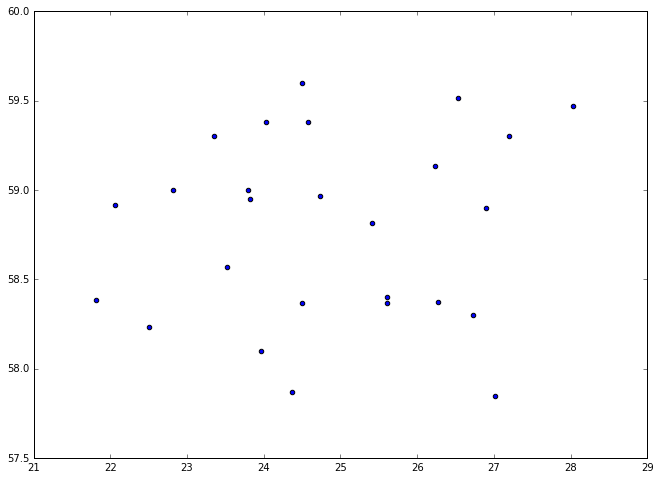

In [3]:
plt.figure(figsize=(11,8))
plt.scatter(
    stations["lng"], stations["lat"], marker = 'o',
    cmap = plt.get_cmap('Spectral'))
#for label, x, y in zip(stations["name"], stations["lng"], stations["lat"]):
#    plt.annotate(
#        label, 
#        xy = (x, y), xytext = (-20, 20),
#        textcoords = 'offset points', ha = 'right', va = 'bottom',
#        bbox = dict(boxstyle = 'round,pad=0.1', fc = 'yellow', alpha = 0.5),
#        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

In [6]:
weather = we.load_estonian_weather(cache_path, stations, [2015,2014,2013,2012,2011])
weather.head()

*** Loading weather ***
Cache '../Cache/2015_estonia.csv.gz' exists, skipping filtering...
* Loading year: 2015 *
* Loading year complete! *
Cache '../Cache/2014_estonia.csv.gz' exists, skipping filtering...
* Loading year: 2014 *
* Loading year complete! *
Cache '../Cache/2013_estonia.csv.gz' exists, skipping filtering...
* Loading year: 2013 *
* Loading year complete! *
Cache '../Cache/2012_estonia.csv.gz' exists, skipping filtering...
* Loading year: 2012 *
* Loading year complete! *
Cache '../Cache/2011_estonia.csv.gz' exists, skipping filtering...
* Loading year: 2011 *
* Loading year complete! *
*** Loading weather complete ***


,station,date,type,value
78617,EN000026134,2011-01-01,TAVG,-38
78592,EN000026141,2011-01-01,TMIN,-195
78593,EN000026141,2011-01-01,PRCP,15
78594,EN000026141,2011-01-01,SNWD,640
78595,EN000026141,2011-01-01,TAVG,-63


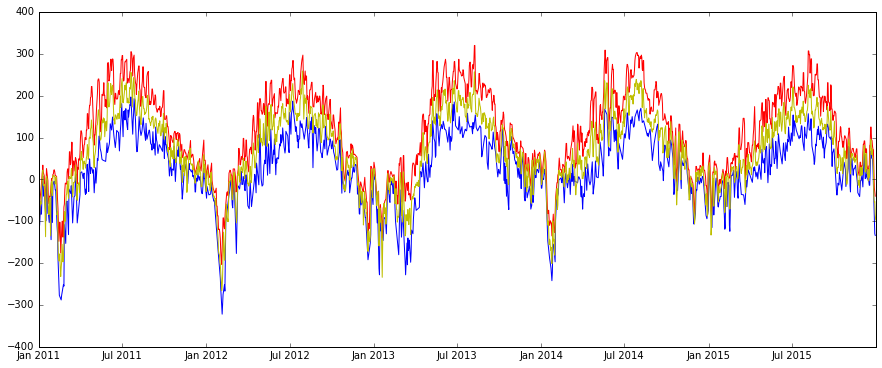

In [7]:
plt.figure(figsize=(15,6))
df=weather
df = df[df.type.isin(["TMIN", "TAVG", "TMAX"])]
df = df[df.station == "EN000026242"]

tmin = df[df.type=="TMIN"]
plt.plot(tmin.date, tmin.value, "b")

tmax = df[df.type=="TMAX"]
plt.plot(tmax.date, tmax.value, "r")

tavg = df[df.type=="TAVG"]
plt.plot(tavg.date, tavg.value, "y")

plt.show()